# Multiple Linear Regression - log(saleprice)

### Prepare data for regression

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
new_test = pd.read_csv('./data/new_test.csv')
new_train = pd.read_csv('./data/new_train.csv')

In [5]:
new_train.drop(['Id'], axis = 1, inplace = True)
new_train = new_train.rename(columns={"Unnamed: 0": "Id"})
new_train = new_train.set_index('Id')

In [6]:
features = new_train.drop(['SalePrice'], axis = 1)
salePrice = new_train['SalePrice']
## get dummies
features = pd.get_dummies(features, drop_first = True)

### See distribution of sale price vs log(saleprice)

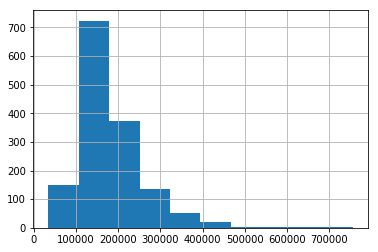

In [7]:
salePrice.hist()

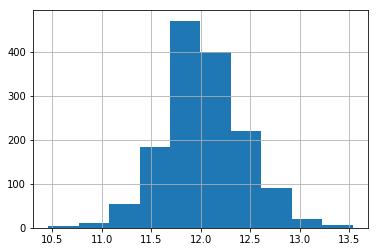

In [8]:
np.log(salePrice).hist()

### Mulitple Linear Regression

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, salePrice, test_size=0.2, random_state=42)

In [10]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1713,20,70.0,8400,5,6,1957,1957,0.0,922.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2525,60,59.0,7837,6,7,1993,1994,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2097,30,67.0,8777,5,7,1910,1950,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2258,50,60.0,7200,5,7,1937,1950,252.0,569.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1839,50,50.0,5000,5,6,1924,1950,0.0,218.0,0.0,...,0,0,0,0,1,0,0,0,1,0


(array([  1.,   1.,   2.,  22., 527., 590.,  18.,   4.,   1.,   2.]),
 array([-1.71158096e+05, -1.36926477e+05, -1.02694858e+05, -6.84632385e+04,
        -3.42316192e+04, -1.86264515e-08,  3.42316192e+04,  6.84632385e+04,
         1.02694858e+05,  1.36926477e+05,  1.71158096e+05]),
 <a list of 10 Patch objects>)

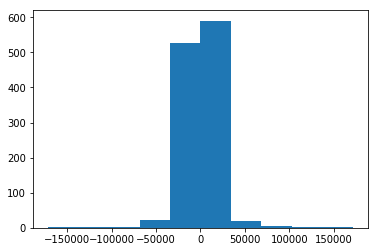

In [11]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
residuals = y_train - lm.predict(X_train)
plt.hist(residuals)

In [12]:
print("R^2 for train set: %f" %lm.score(X_train, y_train))

print('-'*50)

print("R^2 for test set: %f" %lm.score(X_test, y_test))

R^2 for train set: 0.940530
--------------------------------------------------
R^2 for test set: 0.147661


In [13]:
predicted = lm.predict(features)
predicted

array([210934.84687776, 210020.03829941, 209237.62730572, ...,
       270314.59432976, 141777.32506597, 147768.48557643])

### Multiple Linear Regression - log(saleprice)

(array([  4.,   0.,   6.,  44., 512., 548.,  51.,   1.,   1.,   1.]),
 array([-6.80684782e-01, -5.44547826e-01, -4.08410869e-01, -2.72273913e-01,
        -1.36136956e-01, -1.68753900e-14,  1.36136956e-01,  2.72273913e-01,
         4.08410869e-01,  5.44547826e-01,  6.80684782e-01]),
 <a list of 10 Patch objects>)

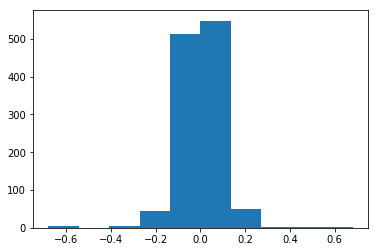

In [14]:
ols = LinearRegression()
ols.fit(X_train, np.log(y_train))
residuals = np.log(y_train) - ols.predict(X_train)
plt.hist(residuals)

In [15]:
print("R^2 for train set: %f" %ols.score(X_train, np.log(y_train)))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, np.log(y_test)))

R^2 for train set: 0.945233
--------------------------------------------------
R^2 for test  set: 0.824488


In [16]:
logpredicted = ols.predict(features)
np.exp(logpredicted)

array([207089.80042105, 208026.573215  , 217996.34762412, ...,
       266073.70504561, 141712.23390292, 145967.06802863])

### Check for multicollinearity
- look at correlation matrix of dependent variables

In [56]:
# X_train.corr()

Before feature selection, do lasso and ridge

#### Ridge

Text(0,0.5,'rmse')

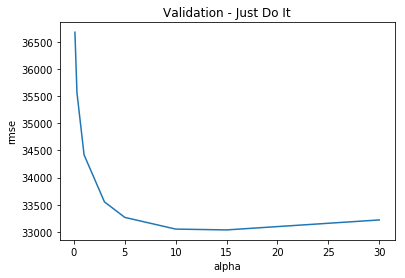

In [58]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso, LinearRegression
from sklearn.model_selection import cross_val_score

model_ridge = Ridge()

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge()
model_ridge.set_params(alpha = 0, normalize=True)
alphas = [0.1, 0.3, 1, 3, 5, 10, 15, 30]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [60]:
from sklearn.model_selection import cross_val_score, train_test_split
# Partition the dataset in train + validation sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train2.shape))
print("X_test : " + str(X_test2.shape))
print("y_train : " + str(y_train2.shape))
print("y_test : " + str(y_test2.shape))

X_train : (817, 264)
X_test : (351, 264)
y_train : (817,)
y_test : (351,)


In [61]:
def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train2, y_train2, scoring = "neg_mean_squared_error", cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test2, y_test2, scoring = "neg_mean_squared_error", cv = 10))
    return(rmse)

### Feature Selection
backward selection

Backward Elimination: Start with all variables. Try model out multiple times, excluding one variable at each time. Remove variable that causes the model to improve the most when it is left out. Repeat process without the removed variable, until the metric(s) you are judging on can no longer improve.

X = X_train

In [32]:
import statsmodels.api as sm

def backward(X, y):
    x = sm.add_constant(X)
    model = sm.OLS(np.log(y), x)
    results = model.fit()
    # R^2, AIC, BIC values before removing predictor
    rsq_adj_before = results.rsquared_adj
#     aic_before = results.aic
#     bic_before = results.bic
    allp = results.pvalues
    maxp = np.amax(allp)
    pred_maxp = allp[allp == maxp].index[0]
    
    # remove predictor
    new_X = X.drop([pred_maxp], axis = 1)
    new_x = sm.add_constant(new_X)
    new_model = sm.OLS(np.log(y), new_x)
    new_results = new_model.fit()
    # find R^2, AIC, BIC values after removing predictor
    rsq_adj_after = new_results.rsquared_adj
#     aic_after = new_results.aic
#     bic_after = new_results.bic
    
    # if better values, repeat with new predictors
    if (rsq_adj_before <= rsq_adj_after):
        return backward(new_X, y)
    # otherwise return predictors
    else:
        return X

In [33]:
new_X_train = backward(X_train, y_train)

In [31]:
new_X_train.shape

(1168, 253)

Find R^2 for new model.

In [35]:
new_X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=253)

(array([  4.,   0.,   6.,  44., 520., 540.,  51.,   1.,   1.,   1.]),
 array([-6.80985655e-01, -5.44788524e-01, -4.08591393e-01, -2.72394262e-01,
        -1.36197131e-01,  9.68114477e-14,  1.36197131e-01,  2.72394262e-01,
         4.08591393e-01,  5.44788524e-01,  6.80985655e-01]),
 <a list of 10 Patch objects>)

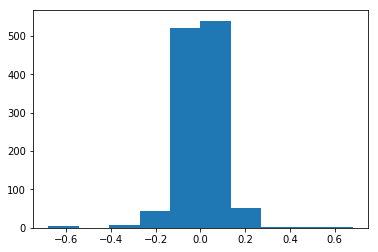

In [36]:
new_ols = LinearRegression()
new_ols.fit(new_X_train, np.log(y_train))
new_residuals = np.log(y_train) - new_ols.predict(new_X_train)
plt.hist(new_residuals)

In [39]:
print("R^2 for train set: %f" %new_ols.score(new_X_train, np.log(y_train)))

print('-'*50)

new_X_test = X_test[new_X_train.columns]
print("R^2 for test  set: %f" %new_ols.score(new_X_test, np.log(y_test)))

R^2 for train set: 0.945230
--------------------------------------------------
R^2 for test  set: 0.825576


In [42]:
logpredicted = new_ols.predict(new_X_test)
prediction = np.exp(logpredicted)

### Cross Validation

In [53]:
X_train.drop(new_X_train.columns, axis = 1).columns

Index(['MiscVal', 'LandContour_Low', 'RoofStyle_Mansard', 'RoofMatl_Membran',
       'Exterior1st_ImStucc', 'BsmtFinType2_Unf', 'HeatingQC_Fa',
       'GarageFinish_Unf', 'PavedDrive_Y', 'Fence_MnWw', 'SaleType_ConLI'],
      dtype='object')

In [46]:
from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [50]:
for train_index, test_index in kf.split(X_train):
    print('TRAIN:', train_index, 'TEST:', test_index)

TRAIN: [ 234  235  236  237  238  239  240  241  242  243  244  245  246  247
  248  249  250  251  252  253  254  255  256  257  258  259  260  261
  262  263  264  265  266  267  268  269  270  271  272  273  274  275
  276  277  278  279  280  281  282  283  284  285  286  287  288  289
  290  291  292  293  294  295  296  297  298  299  300  301  302  303
  304  305  306  307  308  309  310  311  312  313  314  315  316  317
  318  319  320  321  322  323  324  325  326  327  328  329  330  331
  332  333  334  335  336  337  338  339  340  341  342  343  344  345
  346  347  348  349  350  351  352  353  354  355  356  357  358  359
  360  361  362  363  364  365  366  367  368  369  370  371  372  373
  374  375  376  377  378  379  380  381  382  383  384  385  386  387
  388  389  390  391  392  393  394  395  396  397  398  399  400  401
  402  403  404  405  406  407  408  409  410  411  412  413  414  415
  416  417  418  419  420  421  422  423  424  425  426  427  428  429

In [ ]:
k5 = ms.KFold(n_splits=5)
train_error = []
test_error = []
for train_index, test_index in k5.split(y):
    x_train = X[train_index]
    y_train = y[train_index]
    x_test = X[test_index]
    y_test = y[test_index]
    ## Fit a LDA model with the training dataset
    model.fit(x_train, y_train)
    train_error.append(model.score(x_train, y_train))
    test_error.append(model.score(x_test, y_test))

In [184]:
X = X_train
y = y_train

In [187]:
x = sm.add_constant(X)
model = sm.OLS(np.log(y), x)
results = model.fit()
# R^2, AIC, BIC values before removing predictor
rsq_adj_before = results.rsquared_adj
aic_before = results.aic
bic_before = results.bic
allp = results.pvalues
maxp = np.amax(allp)
pred_maxp = allp[allp == maxp].index[0]

In [188]:
print(rsq_adj_before)
print(aic_before)
print(bic_before)
print(maxp)
print(pred_maxp)

0.9301493267991948
-1768.9620397975873
-488.01085446037973
0.9905816148874458
Exterior1st_ImStucc


In [189]:
results.rsquared

0.9452327626574664

In [190]:
new_X.shape

(1168, 263)

In [191]:
# remove predictor
new_X = X.drop([pred_maxp], axis = 1)
x = sm.add_constant(new_X)
model = sm.OLS(np.log(y), x)
results = model.fit()

In [192]:
allp = results.pvalues
maxp = np.amax(allp)
pred_maxp = allp[allp == maxp].index[0]
print(maxp)
print(pred_maxp)

0.9816849245084067
Fence_MnWw


In [193]:
# find R^2, AIC, BIC values after removing predictor
rsq_adj_after = results.rsquared_adj
aic_after = results.aic
bic_after = results.bic

In [194]:
print(rsq_adj_after)
print(aic_after)
print(bic_after)

0.9302255723608794
-1770.9618618254558
-495.0737246516362


In [195]:
rsq_adj_before <= rsq_adj_after

True

In [196]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     62.99
Date:                Wed, 14 Nov 2018   Prob (F-statistic):               0.00
Time:                        00:17:11   Log-Likelihood:                 1137.5
No. Observations:                1168   AIC:                            -1771.
Df Residuals:                     916   BIC:                            -495.1
Df Model:                         251                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -45.9761     27.017     -1.702      0.089     -98.999       7.047
MSSubClass               -0.0005      0.001     -1.040      0.299      -0.002       0.000
LotFrontage               0.0002      0.000      0.732      0.464      -0.000       0.001
LotArea                2.293e-06   6.51e-07      3.520      0.000    1.01e-06    3.57e-06
OverallQual               0.0410      0.005      7.663      0.000       0.030       0.051
OverallCond               0.0346      0.005      7.656      0.000       0.026       0.043
YearBuilt                 0.0020      0.000      4.962      0.000       0.001       0.003
YearRemodAdd              0.0012      0.000      3.911      0.000       0.001       0.002
MasVnrArea             2.783e-05   3.24e-05      0.859      0.391   -3.58e-05    9.15e-05
BsmtFinSF1             5.308e-05   1.52e-05      3.498      0.000    2.33e-05    8.29e-05
BsmtFinSF2             4.197e-05   3.12e-05      1.345      0.179   -1.93e-05       0.000
BsmtUnfSF              1.925e-06   1.45e-05      0.132      0.895   -2.66e-05    3.04e-05
TotalBsmtSF            9.697e-05   2.09e-05      4.638      0.000    5.59e-05       0.000
1stFlrSF                2.87e-05   3.64e-05      0.788      0.431   -4.28e-05       0.000
2ndFlrSF                3.42e-05   3.05e-05      1.121      0.263   -2.57e-05    9.41e-05
LowQualFinSF              0.0001   8.31e-05      1.519      0.129   -3.69e-05       0.000
GrLivArea                 0.0002   3.29e-05      5.747      0.000       0.000       0.000
BsmtFullBath              0.0276      0.010      2.672      0.008       0.007       0.048
BsmtHalfBath              0.0074      0.016      0.462      0.645      -0.024       0.039
FullBath                  0.0147      0.012      1.259      0.208      -0.008       0.038
HalfBath                  0.0269      0.011      2.461      0.014       0.005       0.048
BedroomAbvGr              0.0134      0.007      1.840      0.066      -0.001       0.028
KitchenAbvGr             -0.0531      0.028     -1.871      0.062      -0.109       0.003
TotRmsAbvGrd              0.0033      0.005      0.644      0.520      -0.007       0.013
Fireplaces                0.0191      0.013      1.413      0.158      -0.007       0.046
GarageYrBlt              -0.0003      0.000     -0.992      0.321      -0.001       0.000
GarageCars                0.0082      0.012      0.681      0.496      -0.015       0.032
GarageArea                0.0002   4.23e-05      3.821      0.000    7.86e-05       0.000
WoodDeckSF             9.305e-05   3.05e-05      3.050      0.002    3.32e-05       0.000
OpenPorchSF             1.78e-05   5.86e-05      0.304      0.761   -9.72e-05       0.000
EnclosedPorch          9.828e-05   6.72e-05      1.463      0.144   -3.36e-05       0.000
3SsnPorch              

### Significant Coefficients

In [16]:
import statsmodels.api as sm
x = sm.add_constant(features)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(np.log(salePrice), x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     79.89
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:59:43   Log-Likelihood:                 1375.4
No. Observations:                1460   AIC:                            -2239.
Df Residuals:                    1204   BIC:                            -885.5
Df Model:                         255                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -44.34

In [96]:
test = results.pvalues
test[test == maxp].index[0]

'Exterior1st_Stone'

In [78]:
results.pvalues.aggregate(max)

0.9929039776659445

In [80]:
np.amax(results.pvalues)

0.9929039776659445

In [17]:
pValues = results.pvalues
sigCoef = pValues[pValues<0.05]

In [20]:
sigCoef.index

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'HalfBath', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch',
       'ScreenPorch', 'Month', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_FR2', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAn',
       'Condition2_PosN', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Foundation_PConc', 'Foundation_Stone',
       'BsmtCond_Po', 'BsmtExposure_Gd', 'BsmtFinType2_BLQ', 'HeatingQC_Gd',
       'HeatingQC_TA', 'CentralAir_Y', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Functional_Maj2', 'Functional_Sev'

### Normalize Features

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler 

In [29]:
scaleType = 'standard'
if scaleType not in ['standard', 'minmax', 'maxabs']: 
           raise ValueError('%s is not a valid choice' %(scaleType))
if scaleType == 'standard':
      scaler = StandardScaler()
elif scaleType == 'minmax':
      scaler = MinMaxScaler()
elif scaleType == 'maxabs':
      scaler = MaxAbsScaler()

# Fix the scale model using the train set
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [30]:
X_add_const = sm.add_constant(X_train_scaled)
ols = sm.OLS(y_train, X_add_const)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     57.42
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:35:13   Log-Likelihood:                -13154.
No. Observations:                1168   AIC:                         2.681e+04
Df Residuals:                     915   BIC:                         2.810e+04
Df Model:                         252                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.814e+05    622.625    291.414      0.0

### Feature Selection
Remove non significant coefficients.

In [21]:
sig_columns = sigCoef.index.tolist()
# sig_X = pd.get_dummies(features[sig_columns], drop_first=True)

sig_X_train, sig_X_test, sig_y_train, sig_y_test = train_test_split(features[sig_columns], salePrice, test_size=0.2, random_state=42)

(array([  2.,   6.,   4.,  63., 494., 538.,  56.,   4.,   0.,   1.]),
 array([-7.83759287e-01, -6.27007430e-01, -4.70255572e-01, -3.13503715e-01,
        -1.56751857e-01,  1.33226763e-14,  1.56751857e-01,  3.13503715e-01,
         4.70255572e-01,  6.27007430e-01,  7.83759287e-01]),
 <a list of 10 Patch objects>)

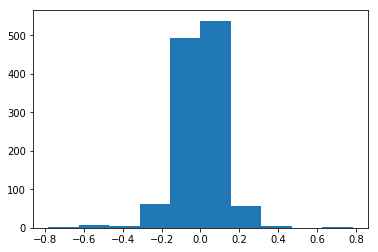

In [23]:
sig_ols = LinearRegression()
sig_ols.fit(sig_X_train, np.log(sig_y_train))
residuals = np.log(sig_y_train) - sig_ols.predict(sig_X_train)
plt.hist(residuals)

In [24]:
print("R^2 for train set: %f" %sig_ols.score(sig_X_train, np.log(sig_y_train)))

print('-'*50)

print("R^2 for test  set: %f" %sig_ols.score(sig_X_test, np.log(sig_y_test)))

R^2 for train set: 0.915977
--------------------------------------------------
R^2 for test  set: 0.747046


In [25]:
sigx = sm.add_constant(features[sig_columns])
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
sigmodel = sm.OLS(np.log(salePrice), x)
sigresults = model.fit()
print(sigresults.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     79.89
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:27:55   Log-Likelihood:                 1375.4
No. Observations:                1460   AIC:                            -2239.
Df Residuals:                    1204   BIC:                            -885.5
Df Model:                         255                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -44.34